# How to Load Natural Stimulus Data

In [201]:
import numpy as np
import os
import h5py
import pyret
import binary     # in igor >> recording
from load_natural_stimulus import *

# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load data

In [202]:
data_dir = os.path.expanduser('~/Documents/Stanford/00 Baccus Lab/Data 2015_07_02/')
stim_file = data_dir + 'natural_scenes_stimulus_compressed.h5'
f = h5py.File(stim_file)

In [203]:
f.keys()

[u'images', u'spikes', u'stimulus']

In [204]:
natural_stimuli = NaturalScenesStimulus(f['images'], f['stimulus'])

In [205]:
natural_stimuli[:5].shape

(5, 500, 500)

In [206]:
f['stimulus'][6]

array([ 14, 507, 961], dtype=int16)

In [207]:
natural_stimuli[0]

array([[ 12,  11,   8, ...,  16,   5,   2],
       [ 17,  16,  15, ...,  13,   4,   2],
       [ 14,  16,  14, ...,   9,   4,   2],
       ..., 
       [  1,   1,   2, ...,  64, 111, 138],
       [  1,   1,   2, ...,  49,  85, 116],
       [  2,   2,   2, ...,  54,  57,  77]], dtype=uint8)

#### Note that now images are int8's, operations on them are mod 255.

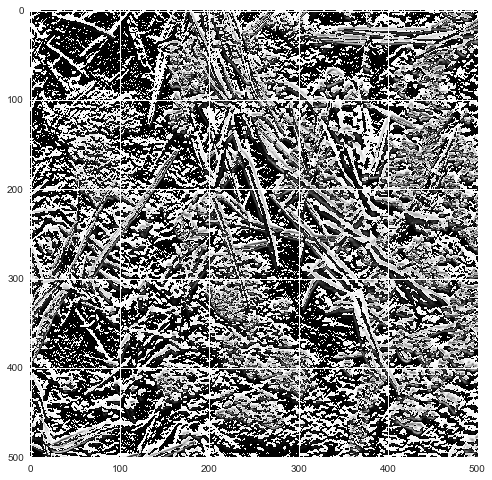

In [208]:
plt.imshow(natural_stimuli[2] - natural_stimuli[0])

In [209]:
natural_stimuli[2]

array([[  6,   6,   6, ...,  11,   4,   2],
       [  7,   7,   6, ...,  15,   6,   1],
       [ 12,  11,   8, ...,  16,   5,   2],
       ..., 
       [  1,   1,   2, ...,  85, 124, 147],
       [  1,   1,   1, ...,  68, 119, 130],
       [  1,   1,   2, ...,  64, 111, 138]], dtype=uint8)

In [210]:
natural_stimuli[1]

array([[ 12,  11,   8, ...,  16,   5,   2],
       [ 17,  16,  15, ...,  13,   4,   2],
       [ 14,  16,  14, ...,   9,   4,   2],
       ..., 
       [  1,   1,   2, ...,  64, 111, 138],
       [  1,   1,   2, ...,  49,  85, 116],
       [  2,   2,   2, ...,  54,  57,  77]], dtype=uint8)

In [211]:
natural_stimuli[2]-natural_stimuli[0]

array([[250, 251, 254, ..., 251, 255,   0],
       [246, 247, 247, ...,   2,   2, 255],
       [254, 251, 250, ...,   7,   1,   0],
       ..., 
       [  0,   0,   0, ...,  21,  13,   9],
       [  0,   0, 255, ...,  19,  34,  14],
       [255, 255,   0, ...,  10,  54,  61]], dtype=uint8)

In [212]:
natural_stimuli.shape

(541200, 500, 500)

In [213]:
tmp = natural_stimuli[:100]

In [214]:
# f.close()

# This still takes too much memory. What can we do?

In [215]:
from sys import getsizeof

In [216]:
x = natural_stimuli[0]

In [217]:
x.shape

(500, 500)

In [218]:
type(x)

numpy.ndarray

In [219]:
x.dtype

dtype('uint8')

In [220]:
natural_stimuli.shape

(541200, 500, 500)

## If the stimulus were float64, expanded would take 1.08 petabytes in memory

In [221]:
x.nbytes * natural_stimuli.shape[0] / 1e9

135.3

## But the stimulus is in float64. If downsampled to uint8 (the monitor's resolution), we'd only have 135.3 GB

In [140]:
500 * 500 * natural_stimuli.shape[0] / 1e9

135.3

## And downsampling the time and cutting out the center 250x250 pixels would leave us with around 16 GB

In [139]:
250*250 * natural_stimuli.shape[0] / 2e9

16.9125

In [128]:
getsizeof(x)

80

In [123]:
getsizeof(natural_stimuli[:100])

80

# Load Training Examples

In [223]:
data_dir = os.path.expanduser('~/Documents/Stanford/00 Baccus Lab/Data 2015_07_02/')
stim_file = data_dir + 'natural_scenes_stimulus_compressed.h5'
f = h5py.File(stim_file)

[autoreload of load_natural_stimulus failed: Traceback (most recent call last):
  File "/Users/lmcintosh/Git/ipython/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
  File "load_natural_stimulus.py", line 160
    '''
    Return the y
      
                ^
SyntaxError: EOF while scanning triple-quoted string literal
]


In [224]:
natural_dataset = NaturalDataset(f['images'], f['stimulus'], 40)

In [225]:
natural_dataset[0:2]

> /Users/lmcintosh/Git/natural-scenes/load_natural_stimulus.py(128)__getitem__()
-> # case where you want a single example
(Pdb) q


BdbQuit: 

In [234]:
np.arange(3,5)

array([3, 4])